# Environment

### Env with **Pytorch 1.6** 

# Load KPs (See 4-2.)

In [1]:
import joblib
import glob
import matplotlib.pyplot as plt

In [2]:
LOAD_KPS_PTH = "predicted_kps" 

In [3]:
kps_filenames = sorted(glob.glob(f"{LOAD_KPS_PTH}/*]*.joblib"))
kps_filenames[:5] , kps_filenames[-5:]

(['predicted_kps/[0000]brush_hair.joblib',
  'predicted_kps/[0001]brush_hair.joblib',
  'predicted_kps/[0002]brush_hair.joblib',
  'predicted_kps/[0003]brush_hair.joblib',
  'predicted_kps/[0004]brush_hair.joblib'],
 ['predicted_kps/[6761]wave.joblib',
  'predicted_kps/[6762]wave.joblib',
  'predicted_kps/[6763]wave.joblib',
  'predicted_kps/[6764]wave.joblib',
  'predicted_kps/[6765]wave.joblib'])

In [4]:
info_d = joblib.load(kps_filenames[1])
info_d.keys()

dict_keys(['width', 'height', 'frames_per_second', 'num_frames', 'num_role_register', 'boxes_buffer', 'kps_buffer', 'roles_buffer', 'frames_split_pos', 'cost_matrix_collection', 'image_size', 'bbox_area_by_role', 'num_frames_by_role', 'motion_distance_by_role', 'frames_by_role', 'completeness_by_role', 'selected_roles', 'boxes_buffer_selected', 'kps_buffer_selected'])

In [5]:
info_d['num_frames'], info_d['kps_buffer'].shape, info_d['kps_buffer_selected'].shape

(395, (394, 17, 3), (394, 1, 17, 3))

In [6]:
for kpfn in kps_filenames[:5]:
    info_d = joblib.load(kpfn)
    print(kpfn)
    #print(info_d.keys())
    print(info_d['num_frames'], info_d['kps_buffer'].shape, info_d['kps_buffer_selected'].shape)
    print('  - num_role_register: ',info_d['num_role_register'])
    #print('  - num_frames_by_role: ', info_d['num_frames_by_role'])
    #print('  - motion_distance_by_role: ', info_d['motion_distance_by_role'])
    #print('  - completeness_by_role: ', info_d['completeness_by_role'])
    print('  - selected_roles: ', info_d['selected_roles'])
    print('*'*64)

predicted_kps/[0000]brush_hair.joblib
409 (415, 17, 3) (408, 1, 17, 3)
  - num_role_register:  6
  - selected_roles:  [0]
****************************************************************
predicted_kps/[0001]brush_hair.joblib
395 (394, 17, 3) (394, 1, 17, 3)
  - num_role_register:  1
  - selected_roles:  [0]
****************************************************************
predicted_kps/[0002]brush_hair.joblib
323 (322, 17, 3) (322, 1, 17, 3)
  - num_role_register:  1
  - selected_roles:  [0]
****************************************************************
predicted_kps/[0003]brush_hair.joblib
246 (281, 17, 3) (245, 1, 17, 3)
  - num_role_register:  26
  - selected_roles:  [7]
****************************************************************
predicted_kps/[0004]brush_hair.joblib
159 (169, 17, 3) (158, 1, 17, 3)
  - num_role_register:  6
  - selected_roles:  [0]
****************************************************************


# Get Selected Video 

In [7]:
import tqdm
video_selected = []
num_roles_by_video = {}

for j, kpfn in enumerate(tqdm.tqdm(kps_filenames)):
        id_, class_ = kpfn.split('/')[-1].split('.')[0][1:].split(']') # "6765", "wave"
        #print(id_, class_)
        info_d = joblib.load(kpfn)
        n_roles = len(info_d['num_frames_by_role'])
        id_ = int(id_)
        num_roles_by_video.update({id_:n_roles})
        if n_roles==1:
            video_selected.append(id_)
        
joblib.dump(video_selected, f"demo/video_selected.joblib")
joblib.dump(num_roles_by_video, f"demo/num_roles_by_video.joblib")
video_selected = joblib.load(f"demo/video_selected.joblib")
num_roles_by_video = joblib.load(f"demo/num_roles_by_video.joblib")

100%|██████████| 5796/5796 [00:28<00:00, 200.19it/s]


In [8]:
print(f"共有[{len(num_roles_by_video)}]支成功辨識的video")
print("選擇比例[{:.2f}]%".format(len(video_selected)/ len(num_roles_by_video)*100))

共有[5796]支成功辨識的video
選擇比例[27.59]%


In [9]:
video_selected[:5]

[1, 2, 10, 12, 17]

# Load Dataset Overview (See 3.)

In [10]:
import pandas as pd

In [11]:
video_info_df = pd.read_csv("demo/video_info.csv", index_col=0)
video_info_df.head()

,filename,class,width,height,frames_per_second,num_frames
0,April_09_brush_hair_u_nm_np1_ba_goo_0.avi,brush_hair,320,240,30.0,409
1,April_09_brush_hair_u_nm_np1_ba_goo_1.avi,brush_hair,320,240,30.0,395
2,April_09_brush_hair_u_nm_np1_ba_goo_2.avi,brush_hair,320,240,30.0,323
3,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,brush_hair,416,240,30.0,246
4,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,brush_hair,416,240,30.0,159


# Write Dataset Overview

In [12]:
import numpy as np
video_info_df['num_roles_in_video'] = \
    [ int(num_roles_by_video[i]) if i in num_roles_by_video.keys() else np.nan  
      for i in range(video_info_df.shape[0]) ]
video_info_df.head()

,filename,class,width,height,frames_per_second,num_frames,num_roles_in_video
0,April_09_brush_hair_u_nm_np1_ba_goo_0.avi,brush_hair,320,240,30.0,409,6.0
1,April_09_brush_hair_u_nm_np1_ba_goo_1.avi,brush_hair,320,240,30.0,395,1.0
2,April_09_brush_hair_u_nm_np1_ba_goo_2.avi,brush_hair,320,240,30.0,323,1.0
3,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,brush_hair,416,240,30.0,246,26.0
4,Aussie_Brunette_Brushing_Hair_II_brush_hair_u_...,brush_hair,416,240,30.0,159,6.0


In [13]:
boo1 = video_info_df['num_roles_in_video']==1
boo2 = video_info_df['num_frames']<=500
video_info_df_ = video_info_df[(boo1)&(boo2)]
video_info_df_.head()

,filename,class,width,height,frames_per_second,num_frames,num_roles_in_video
1,April_09_brush_hair_u_nm_np1_ba_goo_1.avi,brush_hair,320,240,30.0,395,1.0
2,April_09_brush_hair_u_nm_np1_ba_goo_2.avi,brush_hair,320,240,30.0,323,1.0
12,Blonde_being_brushed_brush_hair_f_nm_np2_ri_me...,brush_hair,320,240,30.0,79,1.0
17,Brunette_Foxyanya_ultra_silky_long_hair_brushi...,brush_hair,416,240,30.0,181,1.0
32,Brushing_my_Long_Hair__February_2009_brush_hai...,brush_hair,320,240,30.0,295,1.0


(array([391., 854., 194.,  68.,  34.,  26.,  11.,   8.,   6.,   3.]),
 array([ 22. ,  66.5, 111. , 155.5, 200. , 244.5, 289. , 333.5, 378. ,
        422.5, 467. ]),
 <a list of 10 Patch objects>)

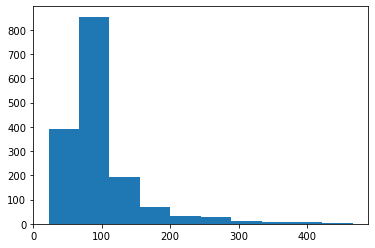

In [14]:
plt.hist(video_info_df_['num_frames'])

In [15]:
class_count = video_info_df_.groupby('class').count()['filename'].to_dict()
class_count

{'brush_hair': 19,
 'cartwheel': 9,
 'catch': 31,
 'chew': 73,
 'clap': 47,
 'climb': 14,
 'climb_stairs': 25,
 'dive': 6,
 'draw_sword': 57,
 'dribble': 42,
 'drink': 29,
 'eat': 25,
 'fall_floor': 8,
 'flic_flac': 6,
 'golf': 46,
 'handstand': 18,
 'hit': 48,
 'hug': 1,
 'jump': 30,
 'kick': 4,
 'kick_ball': 7,
 'kiss': 5,
 'laugh': 42,
 'pick': 19,
 'pour': 60,
 'pullup': 51,
 'punch': 14,
 'push': 36,
 'pushup': 18,
 'ride_bike': 41,
 'ride_horse': 5,
 'run': 39,
 'shoot_ball': 28,
 'shoot_bow': 36,
 'shoot_gun': 41,
 'sit': 16,
 'situp': 26,
 'smile': 63,
 'smoke': 50,
 'somersault': 10,
 'stand': 25,
 'swing_baseball': 41,
 'sword': 1,
 'sword_exercise': 48,
 'talk': 51,
 'throw': 31,
 'turn': 93,
 'walk': 138,
 'wave': 22}

In [16]:
class_selected = []
for c in class_count:
    if class_count[c]>20:
        class_selected.append(c)
len(class_selected)

31

In [17]:
class_selected

['catch',
 'chew',
 'clap',
 'climb_stairs',
 'draw_sword',
 'dribble',
 'drink',
 'eat',
 'golf',
 'hit',
 'jump',
 'laugh',
 'pour',
 'pullup',
 'push',
 'ride_bike',
 'run',
 'shoot_ball',
 'shoot_bow',
 'shoot_gun',
 'situp',
 'smile',
 'smoke',
 'stand',
 'swing_baseball',
 'sword_exercise',
 'talk',
 'throw',
 'turn',
 'walk',
 'wave']

In [18]:
boo3 = video_info_df['class'].apply(lambda c: int(c in class_selected))
video_info_df['class_selected(count>20)'] = boo3

In [19]:
video_info_df['selected'] = (boo1)&(boo2)&(boo3)

In [20]:
video_info_df.to_csv("demo/video_info-1.csv")

In [21]:
video_info_df_ = video_info_df[video_info_df['selected']]
video_info_df_.head()

,filename,class,width,height,frames_per_second,num_frames,num_roles_in_video,class_selected(count>20),selected
216,Ball_hochwerfen_-_Rolle_-_Ball_fangen_(Timo_3)...,catch,320,240,30.0,41,1.0,1,True
218,Ballfangen_catch_u_cm_np1_fr_goo_1.avi,catch,320,240,30.0,37,1.0,1,True
219,Ballfangen_catch_u_cm_np1_fr_goo_2.avi,catch,320,240,30.0,37,1.0,1,True
234,Frisbee_catch_f_cm_np1_ri_med_1.avi,catch,320,240,30.0,54,1.0,1,True
237,Goal_Keeping_Tips_catch_u_cm_np1_fr_med_1.avi,catch,320,240,30.0,59,1.0,1,True


In [22]:
video_info_df_.shape

(1415, 9)

In [23]:
target = video_info_df_['class'].apply(lambda c: class_selected.index(c)).values
target 

array([ 0,  0,  0, ..., 30, 30, 30])

In [24]:
video_info_df_['num_frames'].min()

22

# Get KPs of Selected Video 

In [25]:
sample_num_frames = 20
kps_ = []
for i in video_info_df_.index:
    row = video_info_df.iloc[i]
    id_, class_ = str(i).zfill(4), row['class']
    info_d = joblib.load(f"{LOAD_KPS_PTH}/[{id_}]{class_}.joblib")
    kps = info_d['kps_buffer_selected']
    #print(id_, class_, kps.shape)
    num_frames = kps.shape[0]
    np.random.seed(123)
    idx = np.sort(np.random.permutation(range(num_frames))[:sample_num_frames]) 
    #print(idx)
    kps = kps[idx]
    #print(id_, class_, kps.shape)
    kps[:,:,:,0] /= row['width']
    kps[:,:,:,1] /= row['height']
    kps_.append(kps[:,:,:,:2])
kps_ = np.stack(kps_,0)
kps_.shape

(1415, 20, 1, 17, 2)

In [26]:
kps_.max(), kps_.min()

(0.9995346, -0.0055555557)

In [27]:
kps_ = kps_.reshape(*kps_.shape[:2], -1)
kps_.shape

(1415, 20, 34)

# Prepare Dataset

In [28]:
def to_categorical(y, num_classes=31):
    """ 1-hot encodes a tensor """
    return np.eye(num_classes, dtype='uint8')[y]

target_catag = to_categorical(target)
target_catag.shape

(1415, 31)

In [29]:
from sklearn.model_selection import train_test_split
target_catag_train, target_catag_test, target_train, target_test, input_train, input_test = \
    train_test_split(target_catag, target, kps_, test_size=0.3, random_state=42)
target_catag_train.shape, target_catag_test.shape, target_train.shape, target_test.shape, \
input_train.shape, input_test.shape

((990, 31), (425, 31), (990,), (425,), (990, 20, 34), (425, 20, 34))

# Build RNN Model using PyTorch

In [30]:
import torch 
import torch.nn as nn 

In [31]:
class ActionClassifier(nn.Module):
    def __init__(self, 
                 num_classes = 31,
                 input_size = 34, 
                 hidden_size = 128, 
                 random_seed = 12345678):
        super().__init__()
        self.input_size=input_size
        self.hidden_size=hidden_size
        self.rnn = nn.LSTM(input_size, hidden_size, dropout=0.3)
        torch.random.manual_seed(random_seed)
        self.h0 = torch.rand(hidden_size,) 
        torch.random.manual_seed(random_seed)
        self.c0 = torch.rand(hidden_size,) 
        
        self.cls = nn.Linear(hidden_size, num_classes)
        
    def forward(self , input_): # input_: (seq_len, batch_size, input_size) 
        seq_len, batch_size, input_size = input_.shape
        assert input_size==self.input_size
        #output = []
        h0 = torch.stack([self.h0]*batch_size,0).unsqueeze(0) #(1, batch_size, hidden_size)
        c0 = torch.stack([self.c0]*batch_size,0).unsqueeze(0) #(1, batch_size, hidden_size)
        #print(h0.shape, c0.shape)
        output, (hn, cn) = self.rnn(input_, (h0, c0))# output: (seq_len, batch_size, input_size)
        #print(hn.shape, cn.shape)
        output = self.cls(cn.squeeze(0))
        #print(output.shape)
        return output

In [32]:
batch_size = 32
seq_len = 20
device = "cpu"

In [33]:
target_catag_train, target_catag_test, target_train, target_test, input_train, input_test= \
map(torch.FloatTensor, [target_catag_train, target_catag_test, target_train, target_test, input_train, input_test]) 

In [34]:
model = ActionClassifier().to(device)

/opt/conda/lib/python3.7/site-packages/torch/nn/modules/rnn.py:60: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.3 and num_layers=1
  "num_layers={}".format(dropout, num_layers))


In [35]:
epochs= 1000
loss_fn = nn.BCEWithLogitsLoss()
model.train()
for epo in range(epochs):
    if epo<200:
        optimizer = torch.optim.AdamW(model.parameters(), lr=3e-2)
    elif epo<500:
        optimizer = torch.optim.AdamW(model.parameters(), lr=3e-3)
    else:
        optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
    output_train = model(input_train.permute(1,0,2).to(device))#(1415, 31)
    #print(logits.shape)
    loss = loss_fn(output_train, target_catag_train.to(device))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epo%20==19:
        model.eval()
        accuracy_train = (torch.argmax(output_train.to('cpu'),1)==target_train).sum().numpy()/(target_train.shape[0])
        output_test = model(input_test.permute(1,0,2).to(device))#(1415, 31)
        accuracy_test = (torch.argmax(output_test.to('cpu'),1)==target_test).sum().numpy()/(target_test.shape[0])
        print("[{}] loss:{:.6f}, acc_train:{:4f}, acc_test:{:4f}".format(epo, loss.item(), accuracy_train, accuracy_test))
        model.train()

[19] loss:0.305541, acc_train:0.026263, acc_test:0.021176
[39] loss:0.581310, acc_train:0.074747, acc_test:0.047059
[59] loss:0.805295, acc_train:0.030303, acc_test:0.018824
[79] loss:0.398962, acc_train:0.046465, acc_test:0.009412
[99] loss:0.271569, acc_train:0.035354, acc_test:0.044706
[119] loss:0.853942, acc_train:0.065657, acc_test:0.042353
[139] loss:1.189216, acc_train:0.059596, acc_test:0.030588
[159] loss:1.081008, acc_train:0.040404, acc_test:0.028235
[179] loss:0.629394, acc_train:0.122222, acc_test:0.051765
[199] loss:0.416741, acc_train:0.089899, acc_test:0.025882
[219] loss:0.131153, acc_train:0.110101, acc_test:0.120000
[239] loss:0.125573, acc_train:0.156566, acc_test:0.129412
[259] loss:0.120540, acc_train:0.189899, acc_test:0.122353
[279] loss:0.116979, acc_train:0.209091, acc_test:0.131765
[299] loss:0.117244, acc_train:0.205051, acc_test:0.143529
[319] loss:0.113710, acc_train:0.223232, acc_test:0.150588
[339] loss:0.111346, acc_train:0.261616, acc_test:0.160000
[3

In [36]:
epochs= 1000
loss_fn = nn.BCEWithLogitsLoss()
model.train()
for epo in range(epochs):
    if epo<200:
        optimizer = torch.optim.AdamW(model.parameters(), lr=3e-3)
    elif epo<500:
        optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
    elif epo<700:
        optimizer = torch.optim.AdamW(model.parameters(), lr=3e-3)
    else:
        optimizer = torch.optim.AdamW(model.parameters(), lr=3e-4)
    output_train = model(input_train.permute(1,0,2).to(device))#(1415, 31)
    #print(logits.shape)
    loss = loss_fn(output_train, target_catag_train.to(device))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epo%20==19:
        model.eval()
        accuracy_train = (torch.argmax(output_train.to('cpu'),1)==target_train).sum().numpy()/(target_train.shape[0])
        output_test = model(input_test.permute(1,0,2).to(device))#(1415, 31)
        accuracy_test = (torch.argmax(output_test.to('cpu'),1)==target_test).sum().numpy()/(target_test.shape[0])
        print("[{}] loss:{:.6f}, acc_train:{:4f}, acc_test:{:4f}".format(epo, loss.item(), accuracy_train, accuracy_test))
        model.train()

[19] loss:0.094558, acc_train:0.390909, acc_test:0.197647
[39] loss:0.087593, acc_train:0.461616, acc_test:0.272941
[59] loss:0.085526, acc_train:0.436364, acc_test:0.277647
[79] loss:0.088987, acc_train:0.410101, acc_test:0.237647
[99] loss:0.084322, acc_train:0.436364, acc_test:0.258824
[119] loss:0.084774, acc_train:0.501010, acc_test:0.277647
[139] loss:0.083374, acc_train:0.467677, acc_test:0.265882
[159] loss:0.082414, acc_train:0.469697, acc_test:0.308235
[179] loss:0.085727, acc_train:0.460606, acc_test:0.251765
[199] loss:0.083418, acc_train:0.454545, acc_test:0.247059
[219] loss:0.066507, acc_train:0.603030, acc_test:0.343529
[239] loss:0.065043, acc_train:0.613131, acc_test:0.341176
[259] loss:0.063936, acc_train:0.618182, acc_test:0.352941
[279] loss:0.063008, acc_train:0.627273, acc_test:0.357647
[299] loss:0.062171, acc_train:0.635354, acc_test:0.355294
[319] loss:0.061384, acc_train:0.642424, acc_test:0.350588
[339] loss:0.060654, acc_train:0.647475, acc_test:0.352941
[3

In [37]:
epochs= 1000
loss_fn = nn.BCEWithLogitsLoss()
model.train()
for epo in range(epochs):
    if epo<200:
        optimizer = torch.optim.AdamW(model.parameters(), lr=1e-3)
    elif epo<500:
        optimizer = torch.optim.AdamW(model.parameters(), lr=1e-4)
    elif epo<700:
        optimizer = torch.optim.AdamW(model.parameters(), lr=5e-4)
    else:
        optimizer = torch.optim.AdamW(model.parameters(), lr=5e-5)
    output_train = model(input_train.permute(1,0,2).to(device))#(1415, 31)
    #print(logits.shape)
    loss = loss_fn(output_train, target_catag_train.to(device))
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epo%20==19:
        model.eval()
        accuracy_train = (torch.argmax(output_train.to('cpu'),1)==target_train).sum().numpy()/(target_train.shape[0])
        output_test = model(input_test.permute(1,0,2).to(device))#(1415, 31)
        accuracy_test = (torch.argmax(output_test.to('cpu'),1)==target_test).sum().numpy()/(target_test.shape[0])
        print("[{}] loss:{:.6f}, acc_train:{:4f}, acc_test:{:4f}".format(epo, loss.item(), accuracy_train, accuracy_test))
        model.train()

[19] loss:0.054142, acc_train:0.670707, acc_test:0.378824
[39] loss:0.052368, acc_train:0.690909, acc_test:0.367059
[59] loss:0.050968, acc_train:0.705051, acc_test:0.364706
[79] loss:0.049846, acc_train:0.711111, acc_test:0.369412
[99] loss:0.048828, acc_train:0.714141, acc_test:0.371765
[119] loss:0.047893, acc_train:0.725253, acc_test:0.371765
[139] loss:0.047040, acc_train:0.724242, acc_test:0.376471
[159] loss:0.049152, acc_train:0.728283, acc_test:0.364706
[179] loss:0.047593, acc_train:0.737374, acc_test:0.374118
[199] loss:0.046444, acc_train:0.748485, acc_test:0.376471
[219] loss:0.036758, acc_train:0.835354, acc_test:0.376471
[239] loss:0.036157, acc_train:0.836364, acc_test:0.376471
[259] loss:0.035655, acc_train:0.839394, acc_test:0.378824
[279] loss:0.035195, acc_train:0.841414, acc_test:0.378824
[299] loss:0.034766, acc_train:0.843434, acc_test:0.381176
[319] loss:0.034356, acc_train:0.846465, acc_test:0.381176
[339] loss:0.033962, acc_train:0.850505, acc_test:0.381176
[3

In [38]:
torch.save(model.state_dict(), "demo/model_selected.torchmodel")